In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts

In [31]:
plt.ion()

In [3]:
dataset = pd.read_csv('C:/Users/matlp/Desktop/Nova Pasta/KaggleBC/data.csv')

In [5]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [122]:
X = dataset
X = X.drop(X.columns[[1, 32]], axis=1)
y = dataset[['diagnosis']]

In [123]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [124]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [125]:
y = y.replace('M', 1).replace('B', 0)


In [126]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


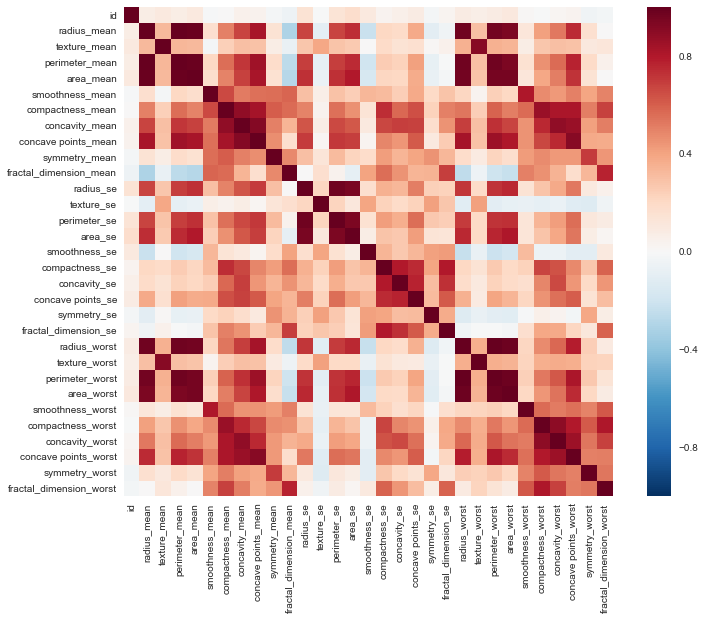

In [127]:
## correlation between variables

corre = X.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corre, vmax=1, square=True);

In [128]:
X = X.drop(X.filter(regex='^(?=(radius|perimeter)).*', axis=1).columns, axis=1)


In [129]:
X.head()

,id,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.9053,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.7339,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7869,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1.1560,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7813,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [130]:
## Separating CV and test datasets
X_cv, X_test, y_cv, y_test = tts(X, y, test_size = 0.2, random_state=1)

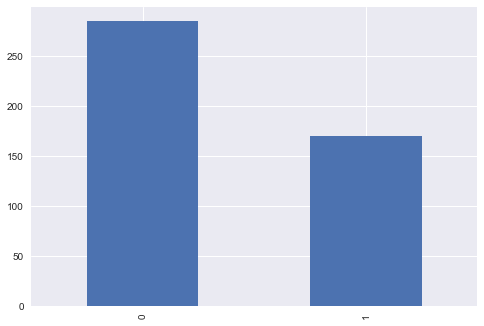

In [131]:
y_cv['diagnosis'].value_counts().plot.bar()

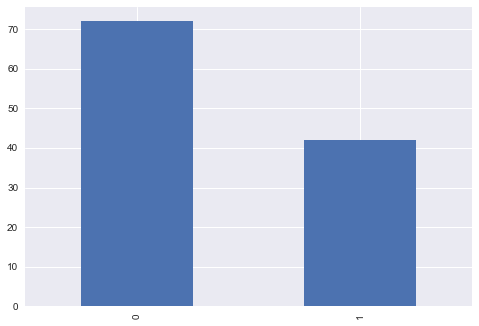

In [132]:
y_test['diagnosis'].value_counts().plot.bar()

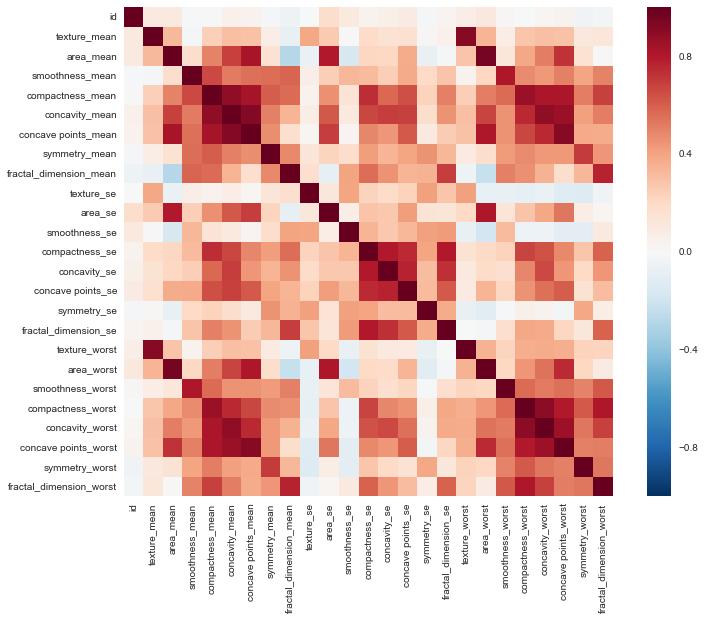

In [133]:
## correlation between variables

corre = X.corr()
f, ax = plt.subplots(figsize = (12,9))
sns.heatmap(corre, vmax=1, square=True);